# Support Vector Machine

https://medium.com/swlh/visualizing-svm-with-python-4b4b238a7a92

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from plotnine import *
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Load Iris Dataset

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's focus on the linearly separable variables to make it easy to visualize.

In [ ]:
iris_ls=iris[(iris['species']!='virginica')]
iris_ls=iris_ls.drop(['sepal_length','sepal_width'], axis=1)
iris_ls.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


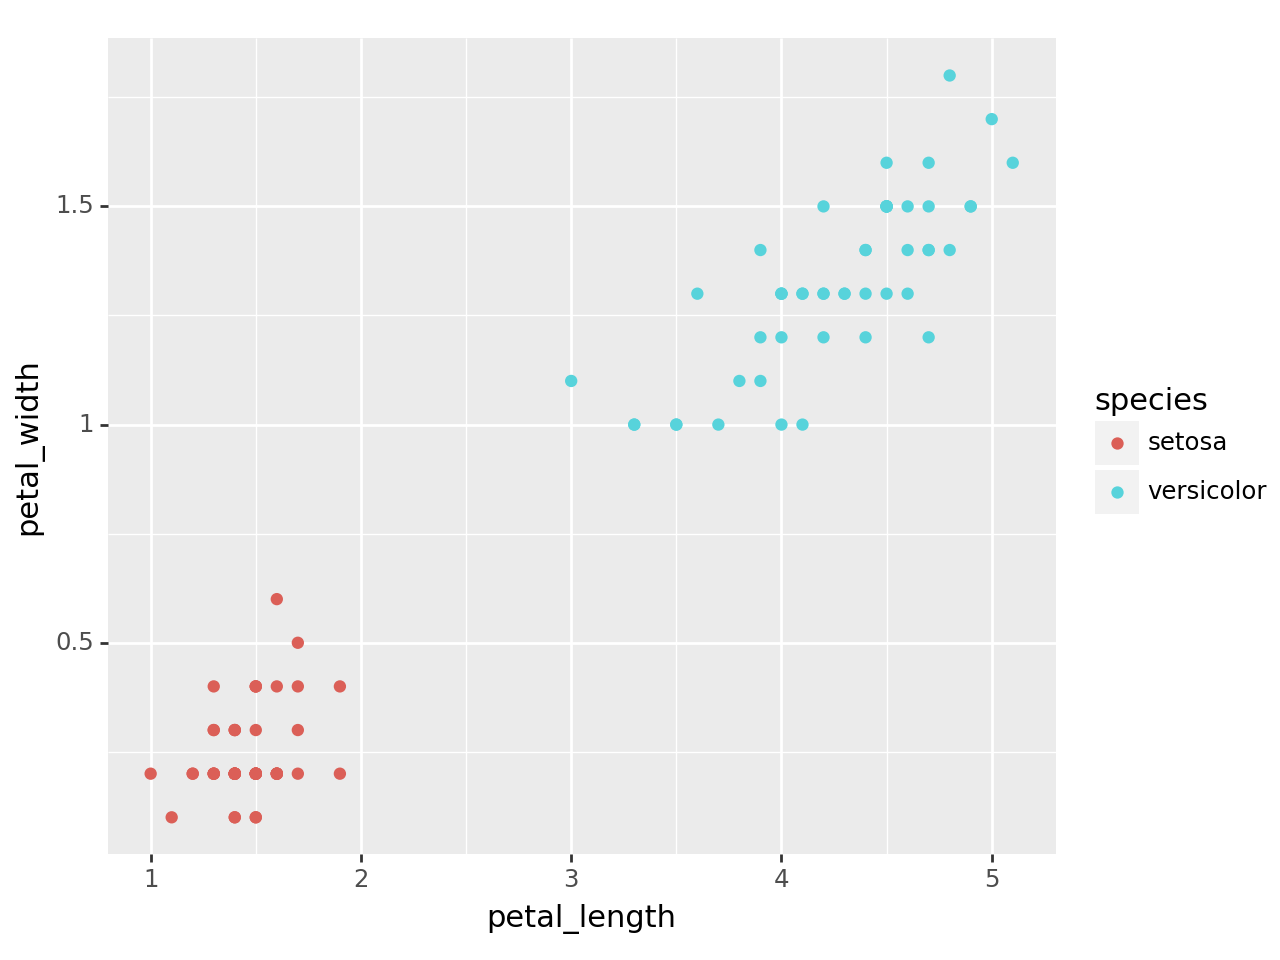

<Figure Size: (640 x 480)>

In [ ]:
plot = (
    iris_ls
    >> ggplot(aes(x="petal_length", y="petal_width", color="species"))
     + geom_point()
)
plot

### Linear Kernel Training

In [ ]:
iris_ls=iris_ls.replace('setosa', 0)
iris_ls=iris_ls.replace('versicolor', 1)

X=iris_ls.iloc[:,0:2]
y=iris_ls['species']

In [ ]:
linear_svc = svm.SVC(kernel='linear', probability=True)
linear_svc.fit(X,y)

SVC(kernel='linear', probability=True)

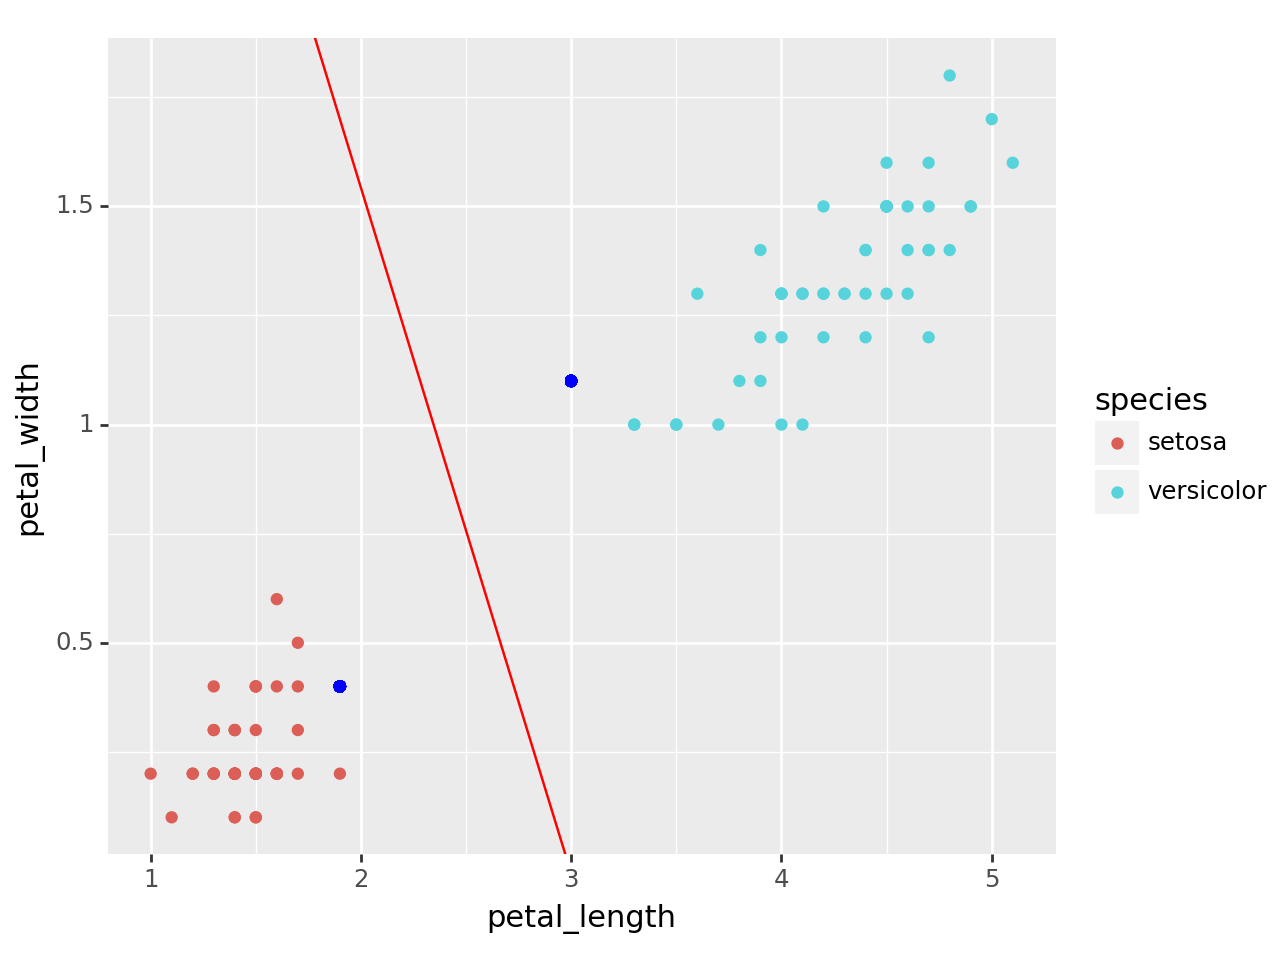

<Figure Size: (640 x 480)>

In [ ]:
SVs = linear_svc.support_vectors_

w = linear_svc.coef_[0]
b = linear_svc.intercept_[0]

(
    plot
    + geom_point(aes(x=SVs[:,0][0], y=SVs[:,1][0]), color="blue")
    + geom_point(aes(x=SVs[:,0][1], y=SVs[:,1][1]), color="blue")
    + geom_abline(intercept = -b/w[1], slope = -(w[0] / w[1]), color="red")
)

### Validation

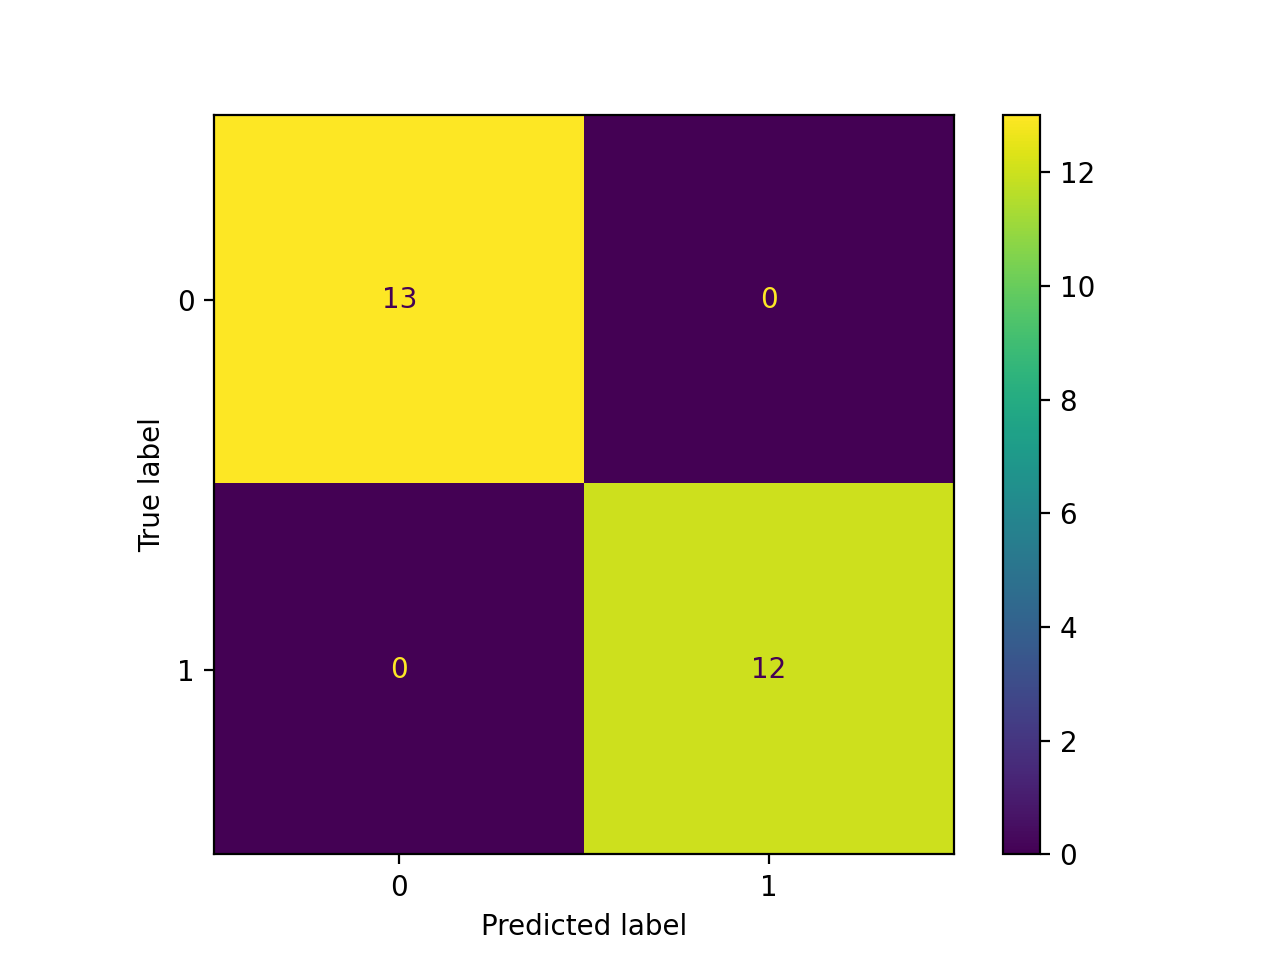

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=linear_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=linear_svc.classes_)
disp.plot()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rskf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)

acc = cross_val_score(linear_svc, X, y, cv=rskf);
recall = cross_val_score(linear_svc, X, y, cv = rskf, scoring = 'recall');
precision = cross_val_score(linear_svc, X, y, cv = rskf, scoring = 'precision');
loss = cross_val_score(linear_svc, X, y, cv = rskf, scoring = 'neg_log_loss');

metrics = []
metrics.append(acc)
metrics.append(recall)
metrics.append(precision)
metrics.append(loss)
metrics_df = pd.DataFrame(metrics)

metrics_df.index=['Accuracy','Recall','Precision','Loss']
metrics_df.T

,Accuracy,Recall,Precision,Loss
0,1.0,1.0,1.0,-0.031854
1,1.0,1.0,1.0,-0.018972
2,1.0,1.0,1.0,-0.031118
3,1.0,1.0,1.0,-0.038498
4,1.0,1.0,1.0,-0.048721
5,1.0,1.0,1.0,-0.041653
6,1.0,1.0,1.0,-0.030306
7,1.0,1.0,1.0,-0.030723
8,1.0,1.0,1.0,-0.034465
9,1.0,1.0,1.0,-0.031982


### RBF Kernel Training

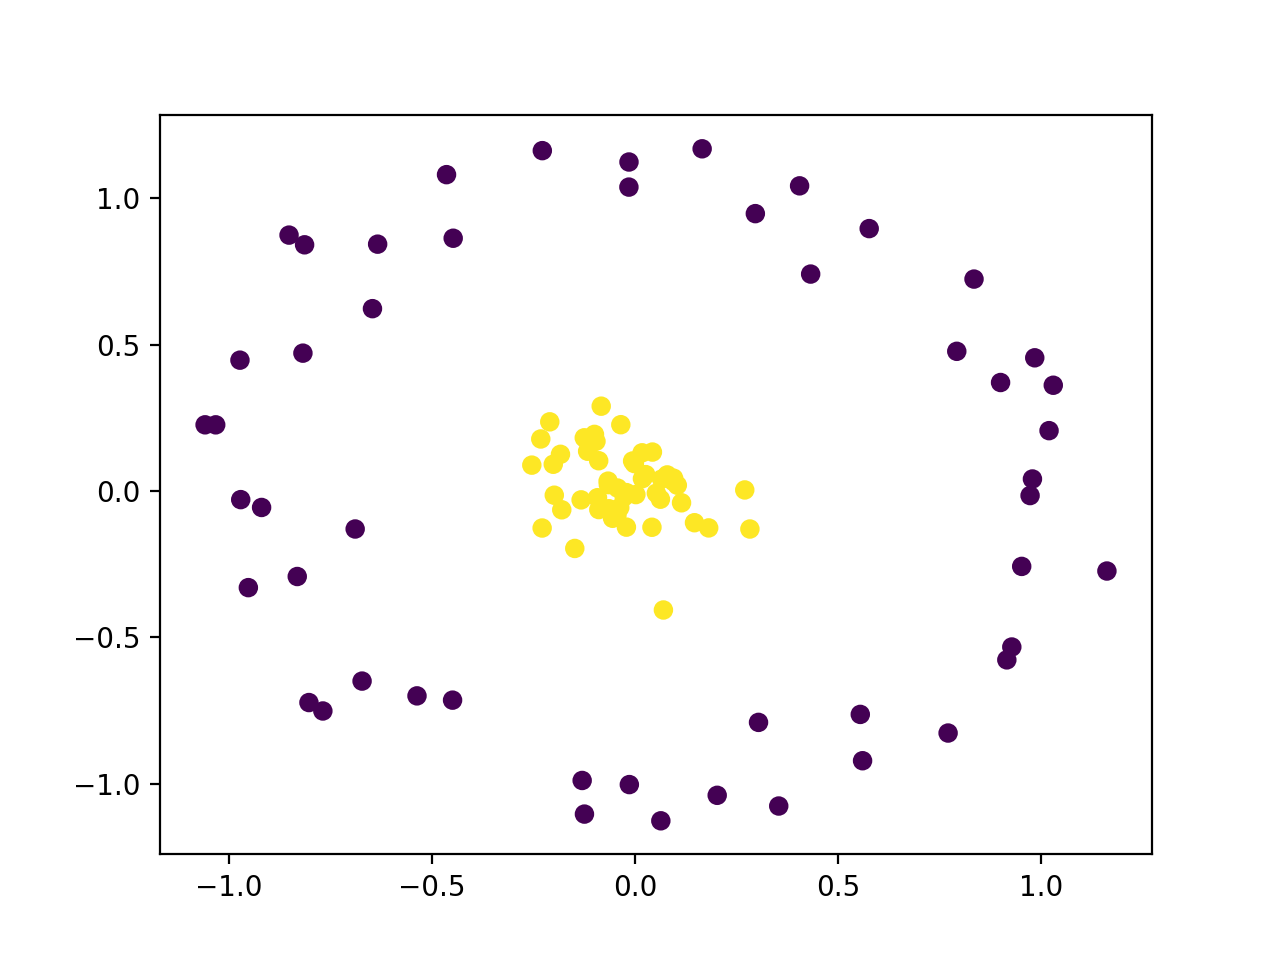

In [ ]:
X, Y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

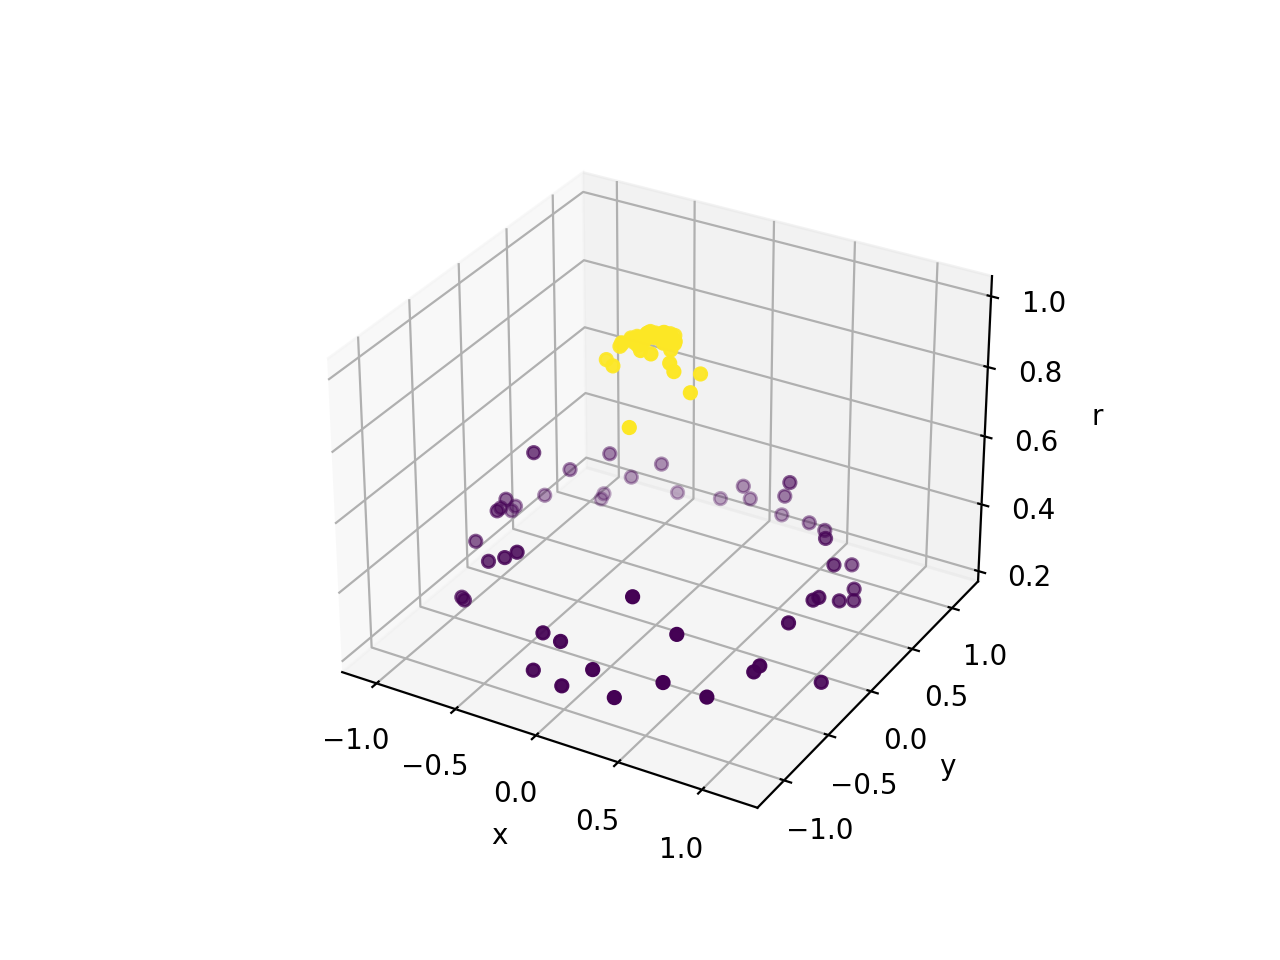

In [ ]:
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=Y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

Running with linear kernel, does not work :(

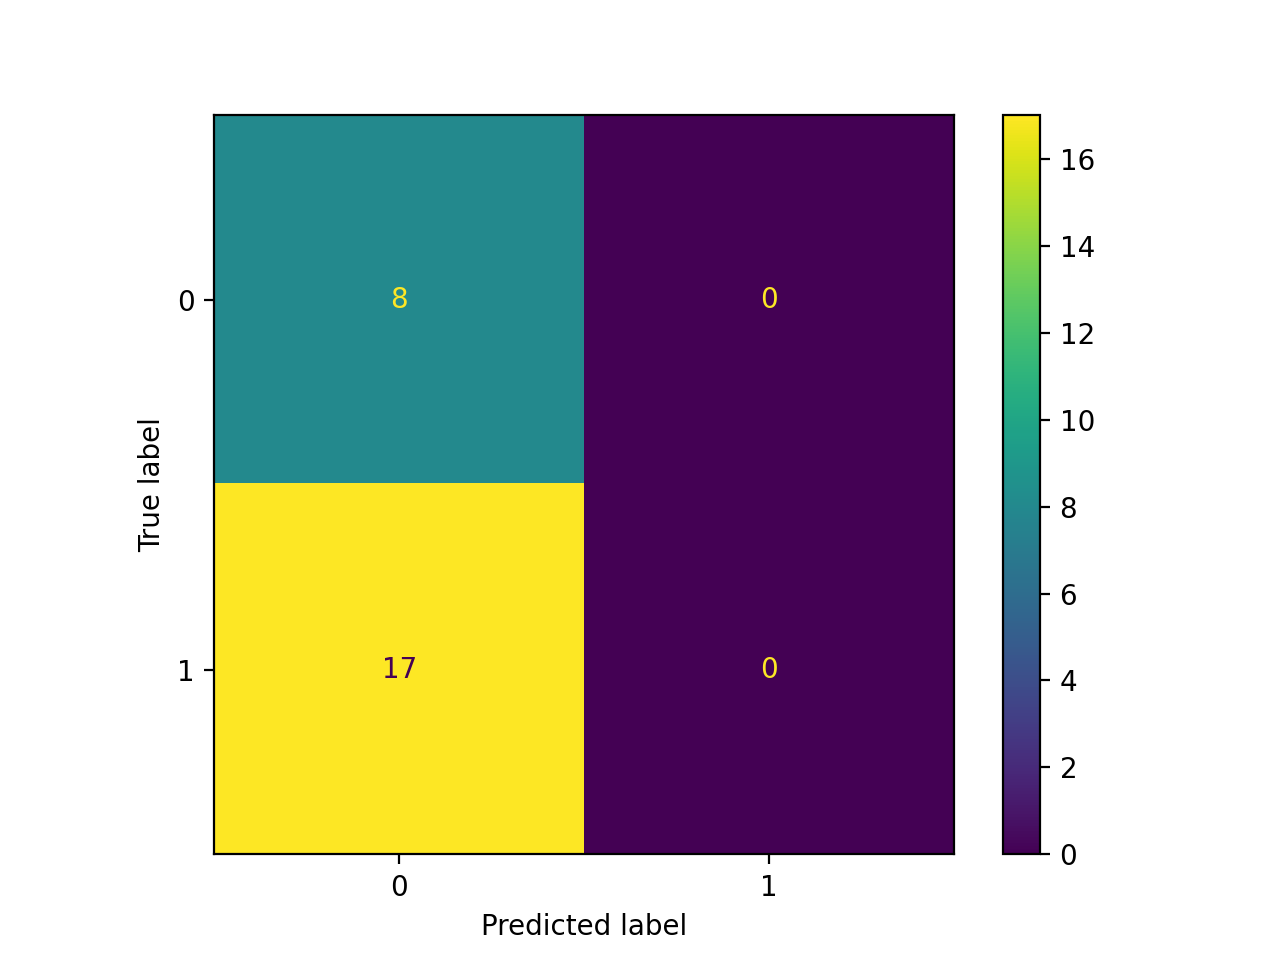

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
linear_svc.fit(X_train,y_train)
y_pred = linear_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=linear_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=linear_svc.classes_)
disp.plot()
plt.show()

Running with RBF kernel: kernel trick!

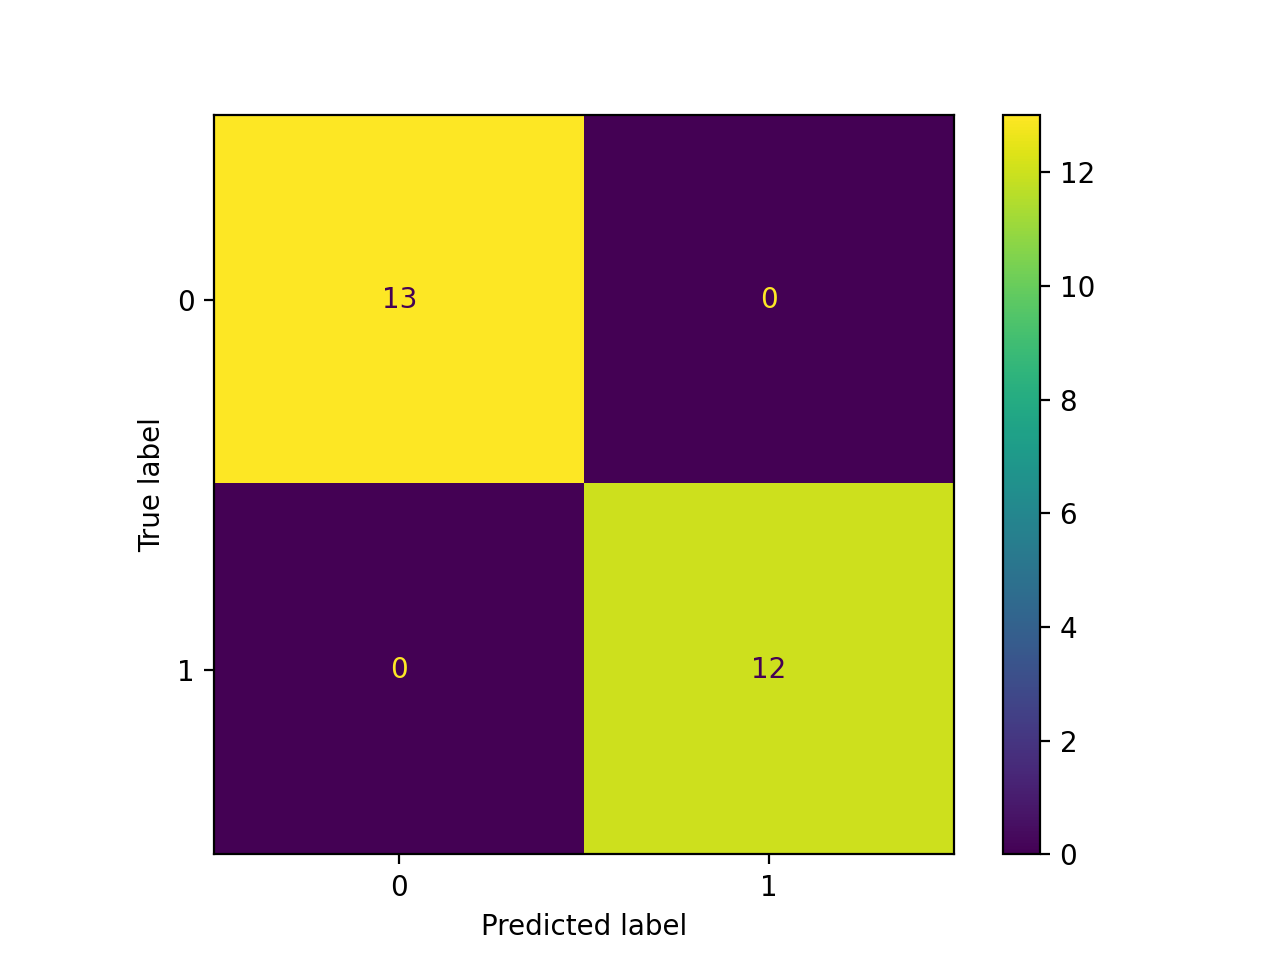

,Accuracy,Recall,Precision,Loss
0,1.0,1.0,1.0,-0.031892
1,1.0,1.0,1.0,-0.026391
2,1.0,1.0,1.0,-0.027771
3,1.0,1.0,1.0,-0.018859
4,1.0,1.0,1.0,-0.023966
5,1.0,1.0,1.0,-0.026524
6,1.0,1.0,1.0,-0.027467
7,1.0,1.0,1.0,-0.032989
8,1.0,1.0,1.0,-0.022620
9,1.0,1.0,1.0,-0.023111


In [ ]:
rbf_svc = svm.SVC(kernel='rbf', probability=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
rbf_svc.fit(X_train,y_train)
y_pred = rbf_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rbf_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rbf_svc.classes_)
disp.plot()
plt.show()

rskf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)

acc = cross_val_score(rbf_svc, X, Y, cv=rskf);
recall = cross_val_score(rbf_svc, X, Y, cv = rskf, scoring = 'recall');
precision = cross_val_score(rbf_svc, X, Y, cv = rskf, scoring = 'precision');
loss = cross_val_score(rbf_svc, X, Y, cv = rskf, scoring = 'neg_log_loss');

metrics = []
metrics.append(acc)
metrics.append(recall)
metrics.append(precision)
metrics.append(loss)
metrics_df = pd.DataFrame(metrics)

metrics_df.index=['Accuracy','Recall','Precision','Loss']
metrics_df.T

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbaedb1f-e080-44ef-8c4c-e26e8e2ffbfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>